<h2>Estatística</h2>

<h3>Descrevendo um único conjunto de dados</h3>
<h4>Para descrevermos grandes volumes de dados lançamos mão das ferramentas estatísticas visto que analisar os dados brutos se torna impraticável
    <br><br>
Por ex.: para analisarmos as quantidades de amigos em uma rede social, usamos o histograma.
</h4>

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math

In [4]:
#num_friends = [random.randint(1,100) for i in range(100) ]
num_friends = [100, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 
               4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
               15, 15, 15, 18, 20, 20]

daily_min = [1, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14, 
             14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
             25, 27, 29, 28, 30, 32]

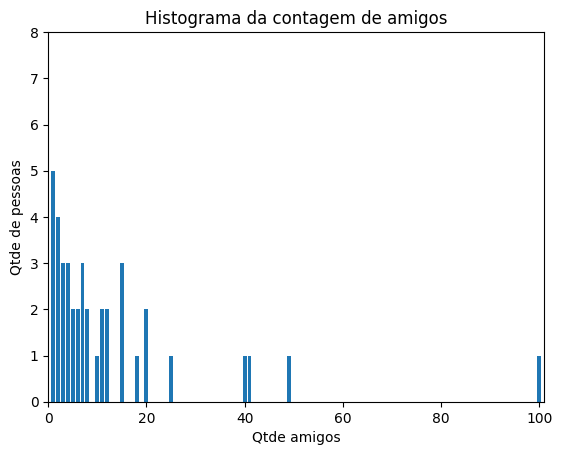

In [5]:
friend_counts = Counter(num_friends)
xs = range(max(num_friends) + 1) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 8])
plt.title("Histograma da contagem de amigos")
plt.xlabel("Qtde amigos")
plt.ylabel("Qtde de pessoas")
plt.show()

<h4>Algumas estatísticas básicas: tamanho da base, maior quantidade de amigos, menor quantidade de amigos, etc.</h4>

In [6]:
print("Tamanho da base:", len(num_friends))
print("Maior quantidade de amigos", max(num_friends))
print("Menor quantidade de amigos", min(num_friends))

Tamanho da base: 40
Maior quantidade de amigos 100
Menor quantidade de amigos 1


In [7]:
sorted_num_friends = sorted(num_friends)
print("Menor qtde de amigos =", sorted_num_friends[0])
print("Decima menor qtde de amigos =", sorted_num_friends[9])
print("Segunda maior qtde de amigos =", sorted_num_friends[-2])

Menor qtde de amigos = 1
Decima menor qtde de amigos = 3
Segunda maior qtde de amigos = 49


<h3>Têndencia Central</h3>
Normalmente queremos ter uma noção de onde os nossos dados estão centrados. 
<h4>Média</h4>
Comumente usaremos a média que é a soma dos valores de uma base de dados dividido pela sua contagem.<br>

In [8]:
def media(x):
    return sum(x)/len(x)
print("A media de amigos =", media(num_friends))

A media de amigos = 12.675


<h4>Mediana</h4>
Também podemos usar a mediana, que é o valor mais ao centro da base de dados considerando que ela esteja ordenada. Caso a quantidade de instâncias em uma base seja um número par, a mediana é obtida pela média dos dois valores mais centrais.<br><br>
Por exemplo, se temos cinco instâncias de dados em um vetor ordenado x, a mediana é x [5 // 2] ou x [2]. Se tivermos seis pontos de dados então a mediana é obtida pela média de x [2] (o terceiro ponto) e x [3] (o quarto ponto).

In [9]:
def mediana(v):
    n = len(v)
    v_ordenado = sorted(v)
    i_centro = n // 2
    if n % 2 == 1:
        return v_ordenado(i_centro)
    else:
        i_centro_2 = i_centro - 1
        return (v_ordenado[i_centro_2] + v_ordenado[i_centro]) / 2
    
print("A mediana de amigos =", mediana(num_friends))

A mediana de amigos = 7.0


Claramente, a média é mais simples de calcular e varia conforme nossos dados são alterados. Se tivermos n pontos de dados e um deles aumentar em alguma quantidade pequena, então necessariamente a média aumentará. (Isso torna a média passível de todo tipo de truques de cálculo.)<br><br>
A mediana, por outro lado, não sofre com valores discrepantes uma vez que considera o valor mais ao centro e é por isso que, para encontrar a mediana, temos que ordenar nossos dados.<br><br>
**A média é muito sensível a valores discrepantes em nossos dados.** Se nosso usuário mais amigável tivesse 200 amigos (em vez de 100), a média subiria, enquanto a mediana permaneceria a mesma. Se os valores discrepantes forem, provavelmente, dados incorretos (ou, de outra forma, não representativos de qualquer fenômeno que estamos tentando entender), a média poderá, às vezes, nos fornecer uma imagem enganosa. <br>
Por exemplo, é frequentemente contada a história que em meados da década de 1980, o curso da Universidade da Carolina do Norte com o maior salário médio inicial era a geografia, principalmente por causa da estrela da NBA (e outlier) Michael Jordan.

<h4>Quantil</h4>
Vimos que a mediana divide o conjunto de dados ao meio, deixando 50% das observações abaixo e 50% acima dela. De modo análogo, podemos definir um quantil como sendo um valor que deixa p% dos dados abaixo e o restante acima dele.
<br><br>
Um quantil é uma <b>medida que marca a posição de separação em um conjunto ordenado de dados amostrais</b> de uma variável ou da sua distribuição probabilística de acordo com um percentual dado. <br>
Por exemplo, o quantil 20% (ou 20%-quantil) é o valor que separa os 20% menores valores dos 80% maiores de uma amostra.

Alguns quantis ganharam nomes particulares. <br>
Por exemplo, **a mediana é o quantil 50%** da distribuição de uma variável. <br>
Também podemos dividir a distribuição de uma variável em quatro partes, gerando três **quartis**. O 1º quartil separa os 25% menores valores dos 75% maiores, o 2º quartil separa os 50% menores dos 50% maiores (também é a mediana) e o 3º quartil separa os 75% menores dos 25% maiores valores.
<br><br>
Seguindo a mesma lógica dos quartis, podemos dividir a distribuição em cinco partes, gerando os **quintis** (o quantil 20% é chamado de 1º quintil). Da mesma forma, podem ser calculados os **decis** (em intervalos de 10%) e **percentis** (em intervalos de 1%).
<br><br>
Exemplo:<br> 
P10 indica que 10% dos dados estão ordenados à sua esquerda e 90% à direita de P10. <br>
P20 indica que 20% dos dados estão ordenados à sua esquerda e 80% à sua direita. 

In [20]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    #print("Index -> {}".format(p_index))
    return sorted(x)[p_index]


In [25]:
print("Tamanho da coleção -> {}".format(len(num_friends)))
print("Coleção ordenada -> {}\n".format(sorted(num_friends)))
print("P10 -> {}".format(quantile(num_friends, 0.10))) # 1
print("P25 -> {}".format(quantile(num_friends, 0.25))) # 3
print("P75 -> {}".format(quantile(num_friends, 0.75))) # 15
print("P90 -> {}".format(quantile(num_friends, 0.90))) # 40

Tamanho da coleção -> 40
Coleção ordenada -> [1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12, 15, 15, 15, 18, 20, 20, 25, 40, 41, 49, 100]

P10 -> 1
P25 -> 3
P75 -> 15
P90 -> 40


<h4>Moda</h4>
<br>
É o valor mais comum, aquele que mais se repete em uma base de dados.

In [14]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
        if count == max_count]

print(mode(num_friends)) # 1

[1]


In [15]:
print(mode(daily_min))

[28, 7, 9, 8, 15, 14, 17, 16, 19, 21, 22, 25]


#### Simetria em distribuições

Em distribuições simétricas, geralmente a média, a mediana e a moda são iguais. Numa distribuição assimétrica positiva (ou à direita), frequentemente a mediana é maior do que a moda e menor do que a média, que é muito influenciada pelos valores dos extremos que ocorrem na “cauda” superior da distribuição. Numa distribuição assimétrica negativa (ou à esquerda), os valores extremos influenciam a média no sentido oposto (“cauda inferior”), fazendo a mediana ser maior do que a média e inferior à moda.

<img src="img/medidas-de-tendencia-central.jpg"/>

<h3>Dispersão</h3>
<br>
Dispersão refere-se a medidas de quão espalhados estão os nossos dados. Normalmente, são estatísticas para as quais valores próximos de zero significam pouco espalhados e para os quais grandes valores significam muito espalhados. 
<h4>Intervalo</h4>
Por exemplo, uma medida muito simples é o intervalo, que é apenas a diferença entre os elementos maiores e menores:

In [18]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends) # 99

99

O intervalo é precisamente zero quando max e min são iguais, o que só pode acontecer se os elementos de x forem todos iguais, o que significa que os dados são tão agrupados (não dispersos) quanto possível.<br>
Por outro lado, se o intervalo for grande, o máximo será muito maior que o mínimo e os dados serão mais dispersos.<br><br>
Assim como a mediana, o intervalo não depende realmente de todo o conjunto de dados. Um conjunto de dados cujos pontos são todos 0 ou 100 tem o mesmo intervalo que um conjunto de dados cujos valores são 0, 100 e muitos 50s. Mas parece que o primeiro conjunto de dados “deveria” estar mais espalhado.

<h4>Variância</h4>
<br>
Uma medida mais complexa de dispersão é a variância, que é calculada como:

In [27]:
def de_mean(x):
    x_bar = media(x)
    return [x_i - x_bar for x_i in x]

def sum_of_squares(x):
    return sum([x_i * x_i for x_i in x])

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [33]:
print("num_friends = {}\n".format(num_friends))
print("mean = {}\n".format(media(num_friends)))
print("de_mean = {}".format(de_mean(num_friends)))

num_friends = [100, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12, 15, 15, 15, 18, 20, 20]

mean = 12.675

de_mean = [87.325, 36.325, 28.325, 27.325, 12.325, -11.675, -11.675, -11.675, -11.675, -11.675, -10.675, -10.675, -10.675, -10.675, -9.675, -9.675, -9.675, -8.675, -8.675, -8.675, -7.675000000000001, -7.675000000000001, -6.675000000000001, -6.675000000000001, -5.675000000000001, -5.675000000000001, -5.675000000000001, -4.675000000000001, -4.675000000000001, -2.6750000000000007, -1.6750000000000007, -1.6750000000000007, -0.6750000000000007, -0.6750000000000007, 2.3249999999999993, 2.3249999999999993, 2.3249999999999993, 5.324999999999999, 7.324999999999999, 7.324999999999999]


In [34]:
print("Variância No amigos = {}".format(variance(num_friends)))
print("Variância Tempo Online = {}".format(variance(daily_min)))

Variância No amigos = 328.2762820512823
Variância Tempo Online = 80.22499999999998


Parece que a variância é quase o desvio médio da média, exceto pelo fato de estarmos dividindo por n-1 em vez de n. De fato, quando estamos lidando com uma amostra de uma população maior, <b>x_bar</b> é apenas uma estimativa da média real e é por isso que dividimos por n-1 em vez de n.


<h4>Desvio Padrão</h4>
<br>
Quaisquer que sejam as unidades em que nossos dados estão, todas as nossas medidas de tendência central como a média, a mediana, etc. estão nessa mesma unidade. O intervalo também está nessa mesma unidade mas a <b>variância</b> tem unidades que são o quadrado das unidades originais. Por isso gostamos de olhar para o desvio padrão que nada mais é que a raiz da variância:

In [35]:
def desvio_padrao(x):
    return math.sqrt(variance(x))

print("Desvio Padrão N. Amigos =", desvio_padrao(num_friends))
print("Desvio Padrão Tempo Online =", desvio_padrao(daily_min))

Desvio Padrão N. Amigos = 18.118396232870126
Desvio Padrão Tempo Online = 8.95684096096386


<h4>Atividade:</h4>
<br>
Dada a matriz a seguir que representa as médias bimestrais de 4 alunos, calcule a variância e o desvio padrão, considerando todas as notas.

In [37]:
import numpy as np

In [38]:
notas = [[5, 8, 10, 7],
         [8, 6, 6, 10],
         [10, 9, 5, 10],
         [8, 10, 9, 4]]

In [39]:
print(np.array(notas))
print("Notas flatted = ", np.array(notas).flatten())

[[ 5  8 10  7]
 [ 8  6  6 10]
 [10  9  5 10]
 [ 8 10  9  4]]
Notas flatted =  [ 5  8 10  7  8  6  6 10 10  9  5 10  8 10  9  4]


resposta:
<div style="display: None">

print("Média geral = ", media(np.array(notas).flatten()))
print("Variância = ", variance(np.array(notas).flatten()))
print("Desvio padrão = ",desvio_padrao(np.array(notas).flatten()))
</div>

<a href="https://numpy.org/doc/stable/reference/generated/numpy.matrix.flatten.html">Mais sobre np.array.flatten</a>

<h3>Correlação</h3>
<br>
A correlação mede o relacionamento entre duas variáveis ou métricas a fim de se obter alguma informação sobre os dados. Por exemplo, qual a relação entre o tempo despendido acessando um determinada rede social e o número de amigos?

<h4>Covariância</h4>
Primeiro analisaremos a covariância, <b>o análogo pareado da variância</b>. Enquanto a variância mede como uma única variável se desvia de sua média, a covariância mede como duas variáveis variam em conjunto a partir de suas respectivas médias

In [40]:
def dot(v, w):
    """ soma dos produtos de dois vetores """
    return sum(v_i * w_i
        for v_i, w_i in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_min) 

44.7173076923077

Lembre-se de que a função "dot" soma os produtos dos pares correspondentes de elementos. Quando os elementos correspondentes de x e y estão ambos acima de suas médias ou ambos abaixo de suas médias, um número positivo entra na soma. Quando um está acima de sua média e o outro abaixo, um número negativo entra na soma. 
<br>Assim:
<ul>
    <li>Uma covariância positiva “grande” significa que x tende a ser grande quando y é grande e tende a ser pequeno quando y é pequeno</li> 
    <li>Uma covariância negativa “grande” significa o oposto - que x tende a ser pequeno quando y é grande e vice-versa</li>
    <li>Uma covariância próxima de zero significa que não existe tal relação</li>
</ul>

<h4>Correlação</h4>
<br>

No entanto, a covariância pode ser difícil de interpretar, por isso é mais comum olharmos para a correlação que divide a covariância de duas variáveis pelos desvios padrão de ambas as variáveis

In [41]:
def correlation(x, y):
    stdev_x = desvio_padrao(x)
    stdev_y = desvio_padrao(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
correlation(num_friends, daily_min) 

0.2755503912677958

A correlação não possui unidade e está sempre entre -1 (anti-correlação perfeita) e 1 (correlação perfeita). Um número como 0,27 representa uma correlação positiva relativamente fraca. 
<br>
No entanto, uma coisa que negligenciamos foi examinar nossos dados, abaixo um gráfico de espalhamento da relação entre quantidade de amigos e minutos por dia com um "outlier".

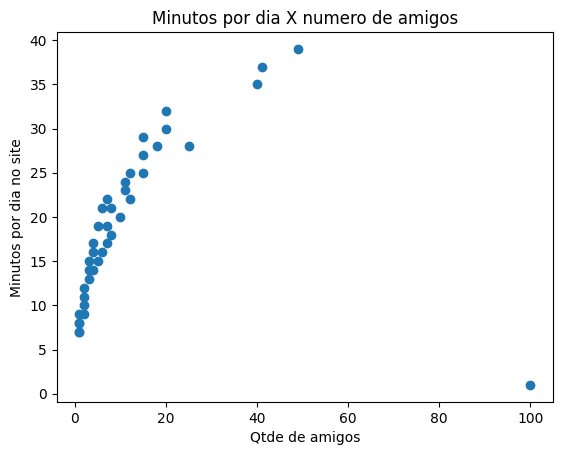

In [42]:
plt.scatter(num_friends, daily_min)
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

A seguir, o mesmo gráfico anterior sem o outlier:

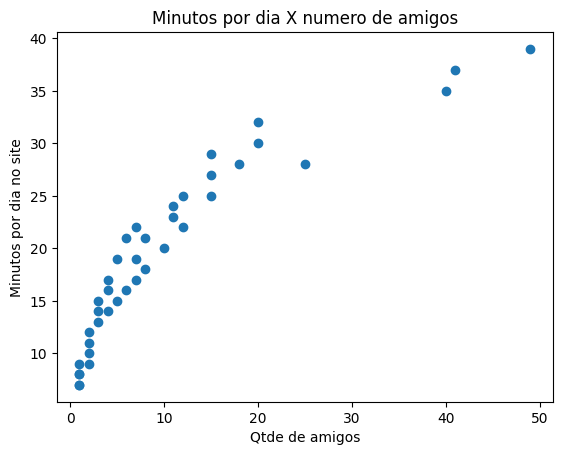

In [43]:
plt.scatter(num_friends[1:], daily_min[1:])
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

In [44]:
print("Correlação com outlier: ",correlation(num_friends, daily_min), " -> Baixa correlação")
print("Correlação sem outlier: ",correlation(num_friends[1:], daily_min[1:]), " -> Alta correlação")

Correlação com outlier:  0.2755503912677958  -> Baixa correlação
Correlação sem outlier:  0.9014335836717391  -> Alta correlação


<h3><a href="https://youtu.be/sxYrzzy3cq8">O Paradoxo de Simpson</a></h3>
<br>
Uma surpresa não incomum ao analisar os dados é o Paradoxo de Simpson, no qual as correlações podem ser enganosas quando variáveis ocultas e confusas são ignoradas.<br>
<!--<video width="800" controls src="Paradoxo_Simpson.mp4" />-->
